# **Methods of Prediction - M507B**

Kirti Anand: GH1023762

This is my Final Project for methods of prediction module.


**Business -**

Creating a model to predict the bank customer's behaviour towards retention in banks services. This model can help to efficiently target existing customers who might reavail the services in future and also, it can help in understanding the customer's reason for not taking the services in future to some extent.

**Dataset** - Bank Customer Churn Prediction

kaggle.com. (n.d.). Bank Customer Churn Prediction. [online] Available at: https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction/input?select=Churn_Modelling.csv [Accessed 27 Jun. 2023].

**About Data -**


The bank churn dataset contains 10000 rows and 14 columns which is completly considered.

 A value of 1 for churn indicates that the member has exited while 0 indicates the member is still using the bank.
Following is the data in tabular format

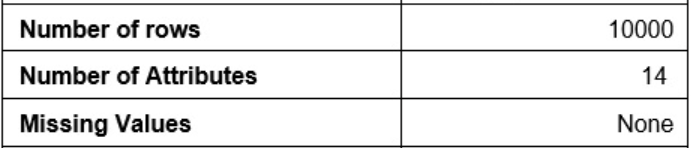



‌I have imported multiple python libraries -

1. Data wrangling
2. Data preprocessing
3. Feature engineering
4. Machine learning
5. Neural Networks

I have tried to fit the dataset in different Classification Machine Learning Algorithms and choosing the best Algorithm for the Customer Churn Dataset.

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

import sklearn.metrics
import sklearn.preprocessing
import sklearn.svm
import imblearn.over_sampling
import sklearn.preprocessing
import sklearn.decomposition
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import  recall_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

import xgboost as xgb
from xgboost import XGBClassifier

# **Loading Data -**

It is observed that the dataset contains 10001 rows and 14 columns.

Value of 1 for indicates that the member has exited and 0 indicates that the member is still with the bank.

In [ ]:
data = pd.read_csv('Churn_Modelling.csv')
data.head(3)

# **Data Exploration**

Checking the shape of the dataset

In [ ]:
data.shape

Checking the information of the dataset

In [ ]:
data.info

Checking categorical columns and numerical columns in the data

In [ ]:
data.select_dtypes(include='object')

Checking the lenght of the categorical columns in the data

In [ ]:
len(data.select_dtypes(include='object').columns)

In [ ]:
data.select_dtypes(include=['int64','float64']).columns

Checking the lenght of the numerical columns in the data

In [ ]:
len(data.select_dtypes(include=['int64','float64']).columns)

Checking statistical summary

In [ ]:
data.describe()

Checking missing data

In [ ]:
data.isnull().values.any()

In [ ]:
data.isnull().values.sum()

Dealing with the categorical data

In [ ]:
data.select_dtypes(include='object').columns

In [ ]:
data.head()

From the data, I have dropped the columns 'RowNumber', 'CustomerID', 'Surname' which are not required and will not be necessary for the results.

In [14]:
data = data.drop(columns=['RowNumber','CustomerId','Surname'])

In [ ]:
data.head()

After dropping not required columns, I have checked the categorical data and converted it to binary data

In [ ]:
data.select_dtypes(include='object').columns

Checking the unique values from the Geography column which is 'France', 'Germany', 'Spain'

In [ ]:
data['Geography'].unique()

Checking the unique values from the Gender column which is 'Female', 'Male'

In [ ]:
data['Gender'].unique()

In [ ]:
data.groupby('Geography').mean()

In [ ]:
data.groupby('Gender').mean()

  Used get_dummies() for categorical variables and converted into numeric form

In [21]:
data = pd.get_dummies(data=data,drop_first=True)

In [ ]:
data.head()

# **Feature engineering**

Declaring x and y axis
Spliting the whole data in X Train and Y Train

In [23]:
x = data.drop(columns='Exited')
y = data['Exited']

In [24]:
x_tn, x_tt, y_tn, y_tt = train_test_split(x, y, test_size=0.33, random_state=42)

Feature Scaling

Applying feature scaling to get all the variables on a same scale by building a standardization model with training the features and reducing the number of test features

In [ ]:
sl = StandardScaler()

x_tn = sl.fit_transform(x_tn)

x_tt = sl.transform(x_tt)
print("X Train value :", x_tn.shape)
print("X Test value:", x_tt.shape)

# **Model Fitting**

I have tested and tuned the following models -

1. Logistic Regression
2. Random Forest Classifier
3. XGBoost Classifier


*   Used RandomizedSearchCV for hyperparameter tuning on all the models mentioned above.
*   Checking the validation score for all the models and the best parameters for all the models.

Logistic Regression Model

In [26]:
lrm = {'C':[0.001, 0.01, 0.1, 1, 10], 'random_state':[25]}

model_lrm = sklearn.linear_model.LogisticRegression()

rand_lrm = RandomizedSearchCV(estimator=model_lrm, param_distributions=lrm,
                                 n_jobs = -1, scoring='roc_auc',
                                 cv=5, verbose=3)

rand_lrm.fit(x_tn, y_tn)

print(f"Accuracy measured through logistic model is {rand_lrm.best_score_}")
print(f"Best parameters measured after tunning logistic regression model is {rand_lrm.best_params_}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Accuracy measured through logistic model is 0.7623630942934654
Best parameters measured after tunning logistic regression model is {'random_state': 25, 'C': 0.01}


Random Forest Classifier

In [40]:
rf = {'n_estimators': [2,3,5], 'criterion': ['gini','entropy'], 'max_depth': [2,3,5], 'random_state': [0]}
model_rf = RandomForestClassifier()

rand_rf = RandomizedSearchCV(estimator=model_rf, param_distributions=rf,
                                 n_jobs = -1, scoring='accuracy',
                                 cv=5, verbose=3)

rand_rf.fit(x_tn, y_tn)

print(f"Measured Accuracy through Random Forest model is {rand_rf.best_score_}")
print(f"Best parameters measured after tunned Random Forest model is {rand_rf.best_params_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Measured Accuracy through Random Forest model is 0.8376119402985074
Best parameters measured after tunned Random Forest model is {'random_state': 0, 'n_estimators': 3, 'max_depth': 5, 'criterion': 'entropy'}


XGBoost Classifier

In [28]:
xgb = {'max_depth': [2, 3, 5,], 'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [100, 500]}

model_xgb = XGBClassifier()

rand_xgb = RandomizedSearchCV(estimator=model_xgb, param_distributions=xgb,
                                 n_jobs = -1, scoring='accuracy',
                                 cv=5)

rand_xgb.fit(x_tn, y_tn)

print(f"Measured Accuracy through Random Forest model is {rand_xgb.best_score_}")
print(f"Best parameters measured for tunned Random Forest model is {rand_xgb.best_params_}")

Measured Accuracy through Random Forest model is 0.8580597014925374
Best parameters measured for tunned Random Forest model is {'n_estimators': 500, 'max_depth': 2, 'learning_rate': 0.1}


# **CNN Model**

A neural network model is build using CNN classifiers and using Keras Sequential models.

Performed hyperparameter tuning on learning rate also the number of layers is created.

Checking shape of the train and test data and then reshaping the x_train and x_test which is useful in convolutional layer.

In [ ]:
x_tn.shape, x_tt.shape

In [30]:
x_tn_rs = x_tn.reshape(6700, 11, 1)

I have constructed a sequential model in Keras (CNN) and specified layers with other required configurations.

1. Adding 1D convolutional layers to the model with filters 32 and 64 wherein keeping kernel size = 3 and activation function as ReLU.
The input_shape parameter define's the shape of input data and according to our data input_shape is (11,1).
2. Added batch normalization layer to the model which normalizes the inputs in every layer.
3. Added 1D max pooling layer to the model which performs downsampling.
4. Added dropout layer to the model which helps preventing overfitting.
5. Used TensorFlow Keras to add Flatten layer and Dense layer.
6. Used Adam optimizer with a learning rate and compiled the model.
7. Lastly the model_history object is created which includs the loss and accuracy values for each epoch.

In [ ]:
mod_cnn = keras.Sequential()

mod_cnn.add(keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(11,1)))
mod_cnn.add(tf.keras.layers.BatchNormalization())
mod_cnn.add(tf.keras.layers.MaxPool1D(pool_size=2))
mod_cnn.add(Dropout(0.3))

mod_cnn.add(keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
mod_cnn.add(tf.keras.layers.BatchNormalization())
mod_cnn.add(tf.keras.layers.MaxPool1D(pool_size=2))
mod_cnn.add(Dropout(0.5))

mod_cnn.add(tf.keras.layers.Flatten())
mod_cnn.add(Dense(units = 512, activation='relu'))
mod_cnn.add(Dropout(0.5))

mod_cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate = 0.00005)
mod_cnn.compile(optimizer = opt, loss = 'mean_squared_error', metrics=['accuracy'])

mod_history = mod_cnn.fit(x_tn_rs, y_tn, epochs=10, validation_data=(x_tt, y_tt))

Checking the Sequential Model summary

In [ ]:
mod_cnn.summary()

# **Final Model** (XGBoost Classifier)

However, CNN does not resulted in better performance because of the smaller dataset where I couldn't use a network of 3 hidden layers with 128 to 512 hidden units at most.

Therefore I choose XGBoost classification model because of the higher accuracy from all the other models.

In [33]:
y_pred = rand_xgb.predict(x_tt)

In [34]:
accuracy = accuracy_score(y_tt, y_pred)
print("Observed accuracy score of our predictions :",accuracy*100,"%")

Observed accuracy score of our predictions : 87.0 %


In [35]:
acc = accuracy_score(y_tt, y_pred)
f1 = f1_score(y_tt, y_pred)
rec = recall_score(y_tt, y_pred)

In [36]:
results = pd.DataFrame([['XGBoosting',acc,f1,rec]],
                       columns = ['Model','Accuracy','F1','Recall'])
results

,Model,Accuracy,F1,Recall
0,XGBoosting,0.87,0.593365,0.486781


A DataFrame of confusion metrix is transformed using pandas for better Visualisation

Confusion Metrix provides hte valuable details about the model's performance in terms of true positives, true negatives, false positives, and false negatives.

In [ ]:
c_m = confusion_matrix(y_tt, y_pred.round())
print(c_m)
c_m_df = pd.DataFrame(c_m,index=["No Churn","Churn"],columns=["No Churn","Churn"])
print("\n")

Performed cross-validation and calculated the mean accuracy and standard deviation of the model's performance.

In [38]:
accuracies = cross_val_score(estimator=model_xgb, X=x_tn, y=y_tn, cv=10)

print("Accuracy is {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f}%".format(accuracies.std()*100))

Accuracy is 84.84%
Standard Deviation is 1.35%


Cross-validation accuracy score is obtained wherein the mean accuracy and standard deviation is also calculated.
Accuracy provides the performance estimation of the model across multiple folds, and the standard deviation provides the indication of the variability in the accuracy scores.

# **Conclusion**
After the implemetation of XGBoost model which is the best model observed after comparing the accuracies on the bank churn dataset, showed excelent results in the terms of accuracy and predicting churned customers with the promising performance. From the evaluation and analysis, the precision of the XGBoost model on previous unseen test data is slightly high to predict those customer who are churned toward the bank.

According to the model most of the customers are churned from the dataset.

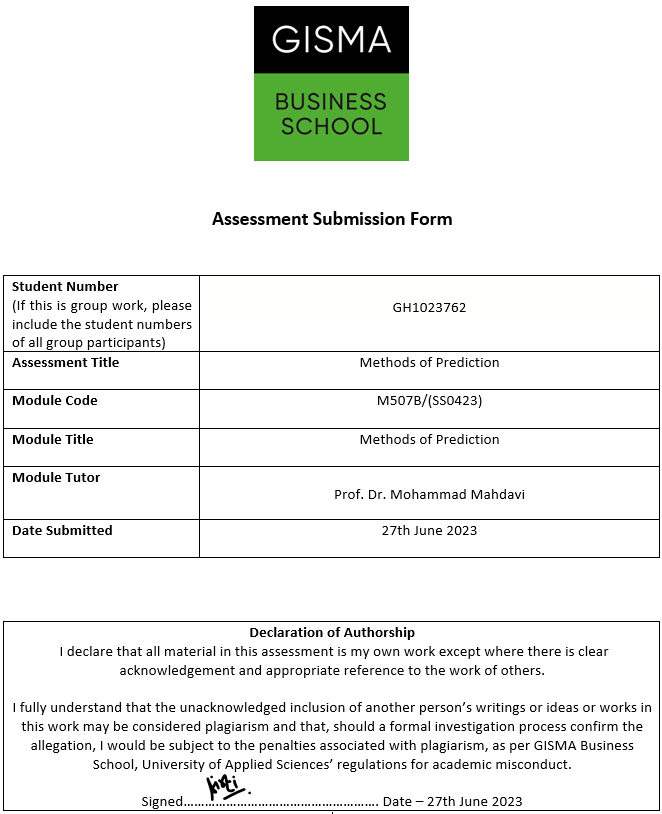

In [ ]:
!jupyter nbconvert --to html M507B.ipynb